# Importing Basic Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
netflix_df = pd.read_csv(r'C:\Users\adars\EPG_Python_Intellipaat\Project\combined_data_1.txt', header=None, usecols=[0,1],names=['Customer_Id', 'Ratings'])
netflix_df.head()

,Customer_Id,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


### Data Cleaning and EDA

In [3]:
netflix_df['Ratings'] = netflix_df['Ratings'].astype('float')

In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Customer_Id  object 
 1   Ratings      float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [5]:
netflix_df.isna().sum()

Customer_Id       0
Ratings        4499
dtype: int64

In [6]:
netflix_df[netflix_df['Ratings'].isna()]['Customer_Id']

0              1:
548            2:
694            3:
2707           4:
2850           5:
            ...  
24046714    4495:
24047329    4496:
24056849    4497:
24057564    4498:
24057834    4499:
Name: Customer_Id, Length: 4499, dtype: object

> Each movie id, with ':' at end is associated with the NaN values in Ratings column

In [7]:
#To find the distribution of different ratings in the dataset
df_ratings = netflix_df.groupby('Ratings')['Ratings'].agg(['count'])
df_ratings

,count
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [8]:
# The total number of movies in the dataset
movie_count = netflix_df.isnull().sum().sum()
movie_count

4499

In [9]:
# Customer count
cust_count = netflix_df['Customer_Id'].nunique()-movie_count
cust_count

470758

In [10]:
# Ratings count in the dataset
rating_count=len(netflix_df)-movie_count
rating_count

24053764

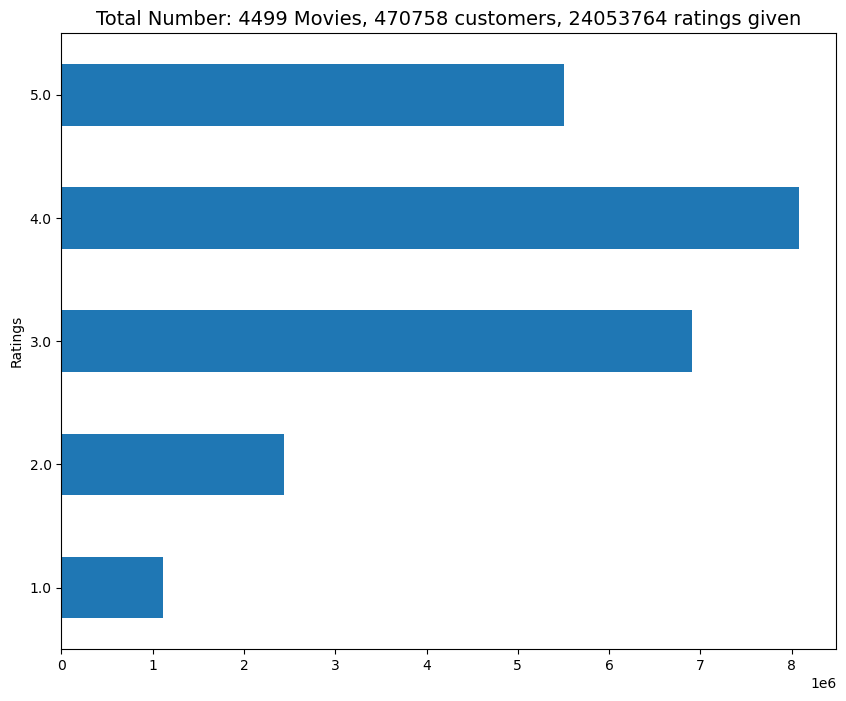

In [11]:
df_ratings.plot(kind = 'barh', legend = False, figsize = (10,8))
plt.title(f'Total Number: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=14)
plt.show()

To segregate the movies IDs from customer columns into a new column movie_ID
* We are using ':' for separating the movie list

In [12]:
movie_id = None
movie_list = [ ]
for cust in netflix_df['Customer_Id']:
  if ':' in cust:
    movie_id = int(cust.replace(':', ''))
  else:
    movie_list.append(movie_id)

In [13]:
netflix_df.dropna(inplace=True)
netflix_df['Movie_Id'] = movie_list
netflix_df.head()

,Customer_Id,Ratings,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


### Pre-filtering
#### Filter out movies with less number of ratings (count)

In [14]:
grouped_movies = netflix_df.groupby("Movie_Id")["Ratings"].count()
grouped_movies

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: Ratings, Length: 4499, dtype: int64

In [15]:
benchmark = grouped_movies.quantile(0.60)

In [16]:
grouped_movies[grouped_movies > grouped_movies.quantile(0.60)]

Movie_Id
3        2012
5        1140
6        1019
8       14910
16       2699
        ...  
4489     1404
4490    10258
4492     9353
4493     6381
4496     9519
Name: Ratings, Length: 1800, dtype: int64

In [17]:
rejected_movies  = grouped_movies[grouped_movies <= benchmark].index
rejected_movies

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

#### Filtering out customers who are less active (rated less number of movies)

In [18]:
grouped_cust = netflix_df.groupby("Customer_Id")["Ratings"].count()
grouped_cust

Customer_Id
10          49
1000004      1
1000027     30
1000033    101
1000035     20
          ... 
999964      48
999972      35
999977      14
999984      38
999988      28
Name: Ratings, Length: 470758, dtype: int64

In [19]:
benchmark_cust = grouped_cust.quantile(0.60)
benchmark_cust

36.0

In [20]:
rejected_cust = grouped_cust[grouped_cust <= benchmark_cust].index
rejected_cust

Index(['1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072', '1000076',
       ...
       '999919', '999921', '999932', '999935', '99994', '999945', '999949',
       '999972', '999977', '999988'],
      dtype='object', name='Customer_Id', length=285506)

In [21]:
netflix_df = netflix_df[~(netflix_df['Movie_Id'].isin(rejected_movies))&~(netflix_df['Customer_Id'].isin(rejected_cust))]
netflix_df['Customer_Id'] = netflix_df['Customer_Id'].astype(int)
netflix_df.head()

,Customer_Id,Ratings,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [22]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19575187 entries, 696 to 24056846
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Customer_Id  int32  
 1   Ratings      float64
 2   Movie_Id     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 522.7 MB


### Loading the movie_titles dataset

In [23]:
movie_titles = pd.read_csv(r'C:\Users\adars\EPG_Python_Intellipaat\Project\movie_titles.csv',encoding="ISO-8859-1",header=None,names=["Movie_ID","Year","Name"],usecols=[0,1,2])
movie_titles=movie_titles[~movie_titles["Movie_ID"].isin(rejected_movies)]
movie_titles.sample(5)

,Movie_ID,Year,Name
5406,5407,1998.0,Still Breathing
11921,11922,1964.0,The Twilight Zone: Vol. 17
9815,9816,1999.0,Baadshah
10822,10823,2000.0,Eating Well for Optimum Health
11880,11881,1993.0,For Love or Money


### Using scikit-surprise library for implementing SVD
* Installing sklearn.surprise

In [24]:
from surprise import Reader, Dataset, SVD # SVD algorithm for recommender engine
from surprise.model_selection import cross_validate

In [25]:
read = Reader()

In [26]:
df = Dataset.load_from_df(netflix_df[["Customer_Id","Movie_Id","Ratings"]][:1000000],read)
df

In [27]:
svd_model = SVD()
cross_validate(svd_model, df, measures=["RMSE"], cv=3)

{'test_rmse': array([0.96798286, 0.96898613, 0.96965633]),
 'fit_time': (8.774508237838745, 8.403595685958862, 9.45667576789856),
 'test_time': (3.5180652141571045, 2.6417510509490967, 2.6452009677886963)}

### Recommendation Engine####  Choosing a random custome  and predicting th top recommended movies for that customer.

In [28]:
np.random.seed(100)

random_customer =np.random.choice(netflix_df['Customer_Id'].unique())

print("Random Customer ID:", random_customer)

Random Customer ID: 976147


In [29]:
df_976147 = movie_titles.copy()
df_976147.reset_index(inplace=True, drop=True)
df_976147.head()

,Movie_ID,Year,Name
0,3,1997.0,Character
1,5,2004.0,The Rise and Fall of ECW
2,6,1997.0,Sick
3,8,2004.0,What the #$*! Do We Know!?
4,16,1996.0,Screamers


In [30]:
df_976147["Estimate_Score"] = df_976147["Movie_ID"].apply(lambda x: svd_model.predict(976147,x).est)
df_976147.index = df_976147.index +1

In [31]:
df_976147.sort_values("Estimate_Score", ascending=False).head(10)

,Movie_ID,Year,Name,Estimate_Score
28,76,1952.0,I Love Lucy: Season 2,4.442761
103,270,2001.0,Sex and the City: Season 4,4.419671
2,5,2004.0,The Rise and Fall of ECW,4.295915
82,223,2003.0,Chappelle's Show: Season 1,4.292622
98,257,1973.0,Charlotte's Web,4.271024
9,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.260801
91,242,1995.0,Neon Genesis Evangelion: The End of Evangelion,4.237971
14,33,2000.0,Aqua Teen Hunger Force: Vol. 1,4.196107
39,106,2004.0,Stevie Ray Vaughan and Double Trouble: Live at...,4.174432
13,32,2004.0,ABC Primetime: Mel Gibson's The Passion of the...,4.168401


In [32]:
pd.set_option('display.expand_frame_repr', False)

### Top 10 Recommended Movies for 5 Random Customers

In [33]:
seeds = [5, 123, 457, 12, 60]
for seed in seeds:
    np.random.seed(seed)
    random_customer =np.random.choice(netflix_df['Customer_Id'].unique())
    df_random = movie_titles.copy()
    df_random["Estimate_Score"] = df_random["Movie_ID"].apply(lambda x: svd_model.predict(random_customer, x).est)
    df_random = df_random.sort_values("Estimate_Score", ascending=False).head(10)

    # Round score
    df_random["Estimate_Score"] = df_random["Estimate_Score"].round(4)

    print("="*80)
    print(f"Random Customer ID: {random_customer}")
    print("-"*80)
    print(f"{'Movie_ID':<9} {'Year':<6} {'Estimate_Score':<14} {'Name'}")
    print("-"*80)

    for _, row in df_random.iterrows():
        print(f"{row['Movie_ID']:<9} {int(row['Year']):<6} {row['Estimate_Score']:<14} {row['Name'][:60]}")

    print("="*80 + "\n")

Random Customer ID: 269442
--------------------------------------------------------------------------------
Movie_ID  Year   Estimate_Score Name
--------------------------------------------------------------------------------
209       1996   4.5921         Star Trek: Deep Space Nine: Season 5
138       1995   4.2842         Star Trek: Voyager: Season 1
223       2003   4.0793         Chappelle's Show: Season 1
18        1994   4.0726         Immortal Beloved
33        2000   4.0051         Aqua Teen Hunger Force: Vol. 1
241       1959   3.9891         North by Northwest
167       2004   3.9767         The Chorus
175       1992   3.9729         Reservoir Dogs
199       1978   3.9493         The Deer Hunter
253       1935   3.9338         A Night at the Opera

Random Customer ID: 785992
--------------------------------------------------------------------------------
Movie_ID  Year   Estimate_Score Name
--------------------------------------------------------------------------------
138 